In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
pd.set_option('display.max_columns',5)
df = pd.read_csv("dataset/Social_Network_Ads.csv")
df.sample(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
78,15667265,Female,28,87000,0
126,15610801,Male,42,65000,0
228,15691808,Female,40,72000,0
221,15663161,Male,35,91000,1
256,15609637,Female,41,72000,0


In [4]:
df.shape

(400, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [6]:

df = df.iloc[:,2:]
df.sample(5)


,Age,EstimatedSalary,Purchased
172,26,118000,0
116,35,75000,0
120,36,75000,0
14,18,82000,0
138,28,59000,0




# train test split:



In [7]:
X = df.drop(columns=['Purchased'],axis=1)
y = df.iloc[:,2:]

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.6,random_state=0)

print(f"X_train {X_train.shape}")
print(f"X_test {X_test.shape}")
print(f"y_train {y_train.shape}")
print(f"y_test {y_test.shape}")

X_train (240, 2)
X_test (160, 2)
y_train (240, 1)
y_test (160, 1)



# Standradization:


In [9]:
from sklearn.preprocessing import StandardScaler

st = StandardScaler()

# standardScaler learn  some of the  information (like: mean,deviation )
st.fit(X_train)


# we learn from one thing but scale both train data and test data
# here, our formula that what we see in our pdf its applies 

X_train_scaled = st.transform(X_train)
X_test_scaled = st.transform(X_test)


In [10]:
st.mean_ # but problem here we are getting numpy array:

array([3.77208333e+01, 6.79625000e+04])

In [11]:
X_train_scaled

array([[-2.66990686e-01, -2.03814684e-01],
       [-1.64078656e+00,  1.09774515e-03],
       [-9.53888624e-01, -7.01459153e-01],
       [ 3.21778974e-01,  5.57288623e-01],
       [-7.07341328e-02, -1.02346440e+00],
       [-1.05201690e+00,  6.45108235e-01],
       [ 1.25522421e-01, -7.60005562e-01],
       [-9.53888624e-01,  1.61112397e+00],
       [-6.59503793e-01,  1.46475795e+00],
       [-1.24827345e+00,  5.57288623e-01],
       [-2.66990686e-01,  8.89173575e-02],
       [-7.07341328e-02,  5.96441534e-02],
       [-2.66990686e-01, -8.47825174e-01],
       [ 9.10548635e-01, -1.31619644e+00],
       [-2.66990686e-01,  2.31368087e+00],
       [ 1.00867691e+00,  2.05022203e+00],
       [-1.15014518e+00,  5.28015419e-01],
       [-1.24827345e+00,  3.23102990e-01],
       [ 1.40119002e+00,  2.05022203e+00],
       [ 1.30306174e+00, -1.31619644e+00],
       [-2.66990686e-01, -2.33087888e-01],
       [-4.63247240e-01,  1.31839193e+00],
       [-7.57632070e-01,  1.14275271e+00],
       [ 1.

In [12]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [13]:
X_train

,Age,EstimatedSalary
281,35,61000
133,21,68000
33,28,44000
378,41,87000
162,37,33000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [14]:
X_train_scaled

,Age,EstimatedSalary
0,-0.266991,-0.203815
1,-1.640787,0.001098
2,-0.953889,-0.701459
3,0.321779,0.557289
4,-0.070734,-1.023464
...,...,...
235,1.008677,-1.111284
236,-0.855760,-0.730732
237,-0.168862,-0.467274
238,-1.052017,-0.408727


In [15]:

X_train.describe()


,Age,EstimatedSalary
count,240.000000,240.000000
mean,37.720833,67962.500000
std,10.212040,34232.326014
min,18.000000,15000.000000
25%,30.000000,41750.000000
50%,37.000000,65500.000000
75%,46.000000,86250.000000
max,60.000000,150000.000000


In [16]:
X_test_scaled.describe()  # mean is almost zero and SD = almost 1

,Age,EstimatedSalary
count,160.000000,160.000000
mean,-0.016150,0.130266
std,1.070411,0.990133
min,-1.935171,-1.550382
25%,-0.855760,-0.533138
50%,-0.070734,0.162100
75%,0.738824,0.593880
max,2.186216,2.401500


<br>
<br>

# Effect of Scalling:

<br>
<br>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'After Scale')

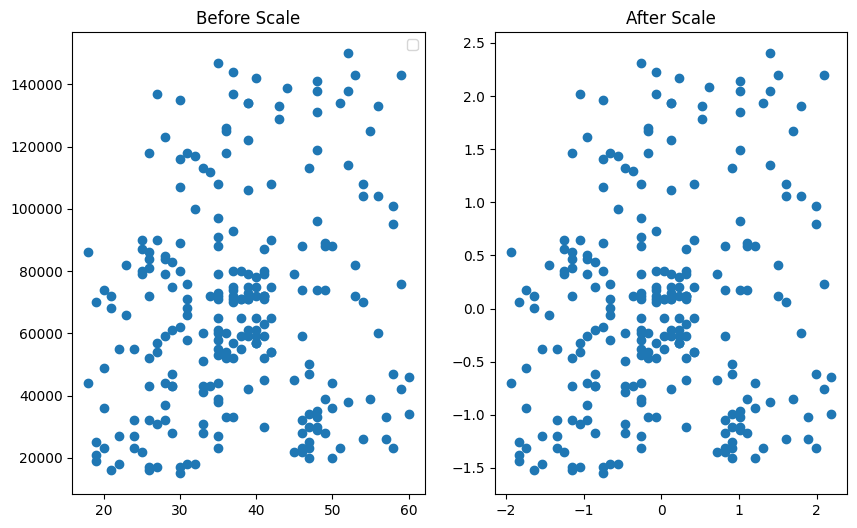

In [17]:

fig,axis  = plt.subplots(nrows=1,ncols=2,figsize=(10,6))
axis[0].scatter(X_train['Age'],X_train['EstimatedSalary'])
axis[0].set_title("Before Scale")
axis[0].legend()

axis[1].scatter(X_train_scaled["Age"],X_train_scaled["EstimatedSalary"])
axis[1].set_title("After Scale")


# from the graph 
# before mean in almost in the range (30_40)

# after mean in zero(0)

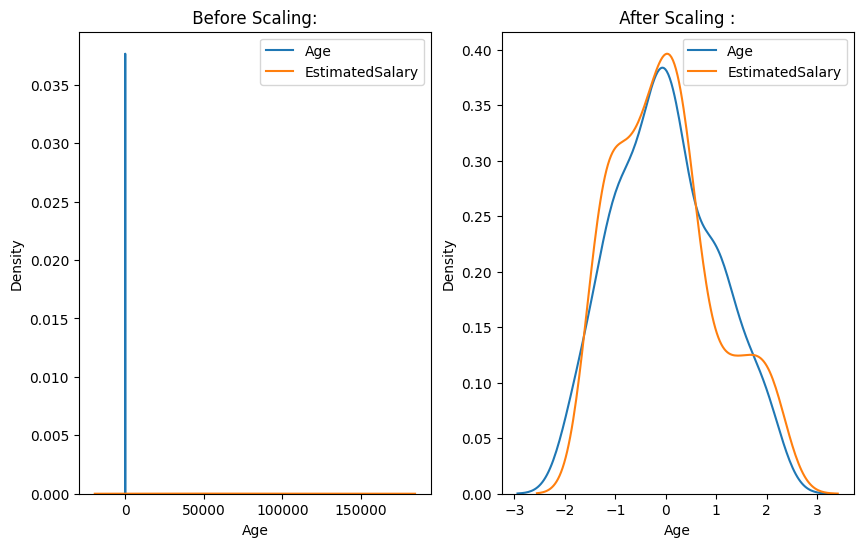

In [18]:
# benefit of our scaling: 


fig,axis  = plt.subplots(nrows=1,ncols=2,figsize=(10,6))

sns.kdeplot(x=X_train["Age"],ax=axis[0],label="Age")
sns.kdeplot(X_train["EstimatedSalary"],ax=axis[0],label="EstimatedSalary")
axis[0].set_title(" Before Scaling: ")
axis[0].legend()


sns.kdeplot(X_train_scaled["Age"],ax=axis[1],label="Age")
sns.kdeplot(X_train_scaled["EstimatedSalary"],ax=axis[1],label="EstimatedSalary")
axis[1].set_title(" After Scaling : ")
axis[1].legend()

plt.show()
# all the column's distribution almost same after scaling: 

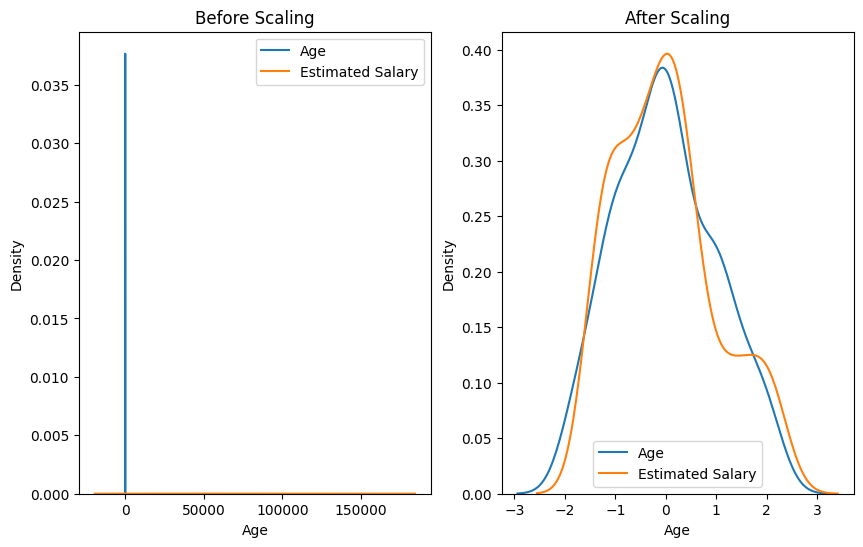

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))

# Plot the KDE plots before scaling
sns.kdeplot(x=X_train["Age"], ax=axis[0], label='Age')
sns.kdeplot(X_train["EstimatedSalary"], ax=axis[0], label='Estimated Salary')
axis[0].set_title("Before Scaling")
axis[0].legend()

# Plot the KDE plots after scaling
sns.kdeplot(X_train_scaled["Age"], ax=axis[1], label='Age')
sns.kdeplot(X_train_scaled["EstimatedSalary"], ax=axis[1], label='Estimated Salary')
axis[1].set_title("After Scaling")
axis[1].legend()

plt.show()


<br>

# Comparison of Distributions:

<br>

Text(0.5, 1.0, ' After: ')

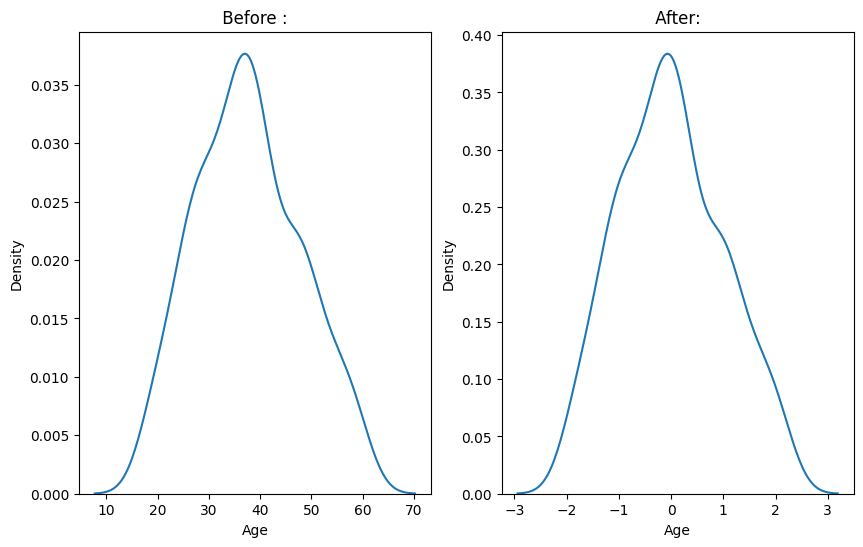

In [20]:

fig,axis  = plt.subplots(nrows=1,ncols=2,figsize=(10,6))

sns.kdeplot(X_train["Age"],ax=axis[0])
axis[0].set_title(" Before : ")

sns.kdeplot(X_train_scaled["Age"],ax=axis[1])
axis[1].set_title(" After: ")

Text(0.5, 1.0, ' After: ')

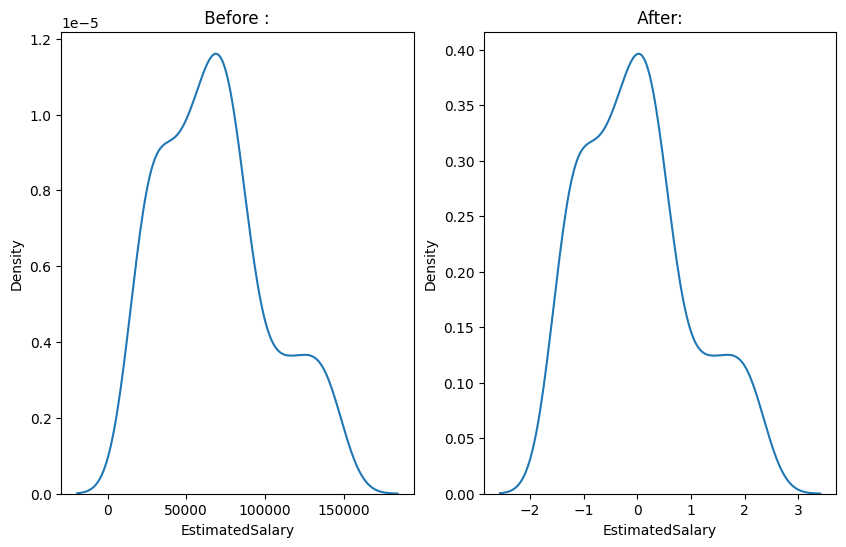

In [21]:

fig,axis  = plt.subplots(nrows=1,ncols=2,figsize=(10,6))

sns.kdeplot(X_train["EstimatedSalary"],ax=axis[0])
axis[0].set_title(" Before : ")

sns.kdeplot(X_train_scaled["EstimatedSalary"],ax=axis[1])
axis[1].set_title(" After: ")

<br>

# Why scaling is important?

<br>


### In LogisticRegression:

`In this dataset we have no impact of feature scaling but most of the cases in logisticRegression feature scaling is mendetary.`


In [22]:
# in logistic regression:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()
lr_scaled = LogisticRegression()


# traning process

lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)


# prediction:

y_pred_sc = lr_scaled.predict(X_test_scaled)
y_pred = lr.predict(X_test)


print(f"unscale data: {accuracy_score(y_test,y_pred)}")
print(f"scale data: {accuracy_score(y_test,y_pred_sc)}")


unscale data: 0.8625
scale data: 0.85625


/home/yasin/allProgram/machine_learning/code/mlEnv/lib/python3.12/site-packages/sklearn/utils/validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/yasin/allProgram/machine_learning/code/mlEnv/lib/python3.12/site-packages/sklearn/utils/validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<br>

### In decision Tree there is no effect of scalling:

<br>

In [23]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

dt.fit(X_train,y_train)
dt_scaled.fit(X_train_scaled,y_train)


y_pred = dt.predict(X_test)
y_pred_sc = dt_scaled.predict(X_test_scaled)


print(f"accuracy scaled: {accuracy_score(y_test,y_pred)}")
print(f"accuracy un scaled: {accuracy_score(y_test,y_pred_sc)}")


accuracy scaled: 0.88125
accuracy un scaled: 0.88125


<br>
<br>
<br>

# Effect of outliers:

<br>
<br>
<br>

In [24]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [25]:
# ------------------------- Add some outliers --------------

# from describe() Age(min:18 max:60)



df1 = pd.DataFrame({'Age':[5,90,50],"EstimatedSalary":[1000,250000,350000],'Purchased':[0,1,1]})

print(f"shape of df {df.shape}")
print(f"shape of df1 {df1.shape}")

df = pd.concat([df,df1],ignore_index=True)
df.shape



shape of df (400, 3)
shape of df1 (3, 3)


(403, 3)

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

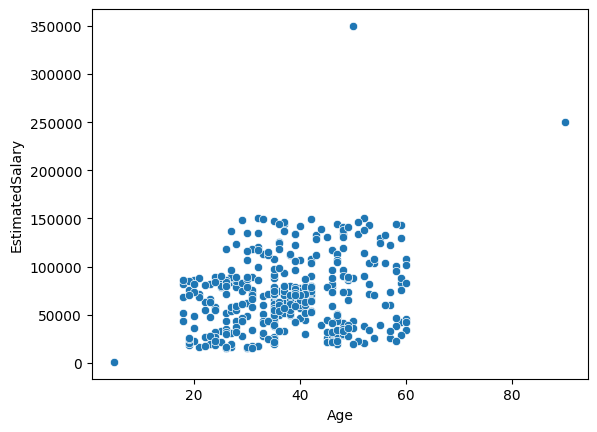

In [26]:
sns.scatterplot(x=df["Age"],y=df["EstimatedSalary"])

In [27]:
X = df.iloc[:,:2]

y = df.iloc[:,2:]


In [28]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

print(f"X_train {X_train.shape}")
print(f"X_test {X_test.shape}")
print(f"y_train {y_train.shape}")
print(f"y_test {y_test.shape}")


X_train (282, 2)
X_test (121, 2)
y_train (282, 1)
y_test (121, 1)


In [29]:
from sklearn.preprocessing import StandardScaler 

sc = StandardScaler()

sc.fit(X_train)

X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)


In [30]:
X_train_sc = pd.DataFrame(X_train_sc,columns=(X_train.columns))
X_test_sc = pd.DataFrame(X_test_sc,columns=(X_test.columns))


<br>
<br>

# Feed the data into LogisticRegression:


<br>
<br>

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


lr = LogisticRegression()

lr.fit(X_train_sc,y_train)

y_pred  = lr.predict(X_test)


# only 35.53% if we have outliers:

print(f"score: {accuracy_score(y_test,y_pred) * 100}")


score: 35.53719008264463


/home/yasin/allProgram/machine_learning/code/mlEnv/lib/python3.12/site-packages/sklearn/utils/validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


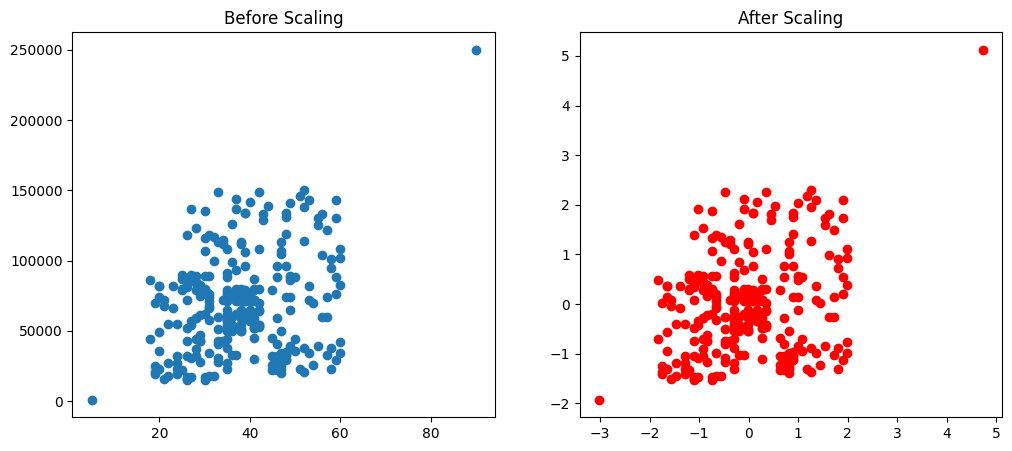

In [32]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_sc['Age'], X_train_sc['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()